1. Setting up the environment.

In [1]:
%pip install tensorflow matplotlib scipy

Note: you may need to restart the kernel to use updated packages.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 79s 0us/step


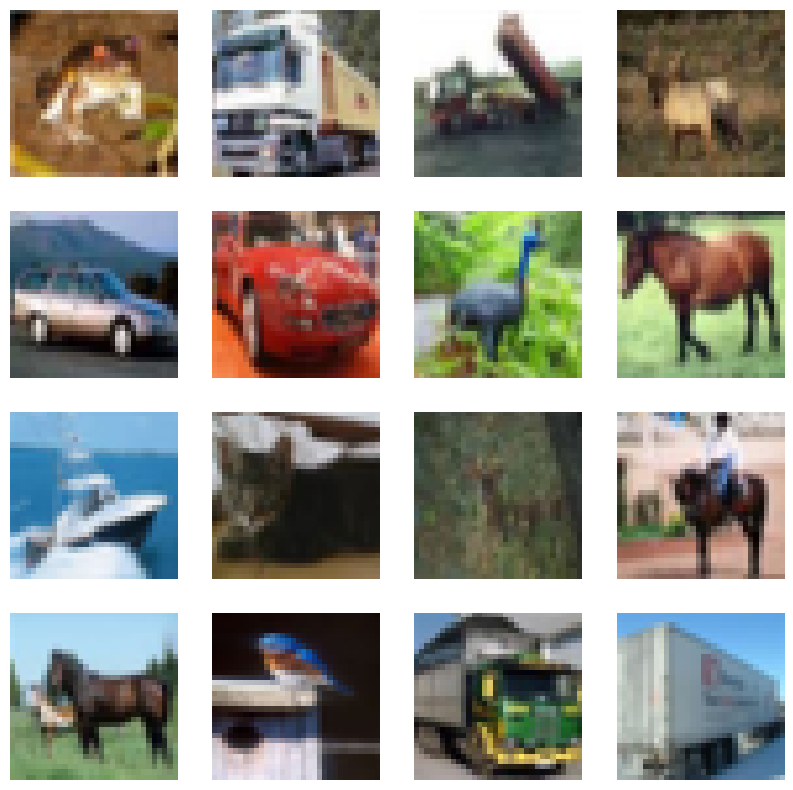

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

plt.figure(figsize = (10,10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')

plt.show()

Creating sample.jpg for the Lab

In [4]:
from PIL import Image, ImageDraw

# Create a blank white image
image = Image.new('RGB', (224, 224), color = (255, 255, 255))

# Draw a red square
draw = ImageDraw.Draw(image)
draw.rectangle([(50, 50), (174, 174)], fill=(255, 0, 0))

# Save the image
image.save('sample.jpg')


In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array 

# Load a sample image 
img_path = 'sample.jpg' 
img = load_img(img_path) 
x = img_to_array(img) 
x = np.expand_dims(x, axis=0) 

Step 2: Basic data augmentation

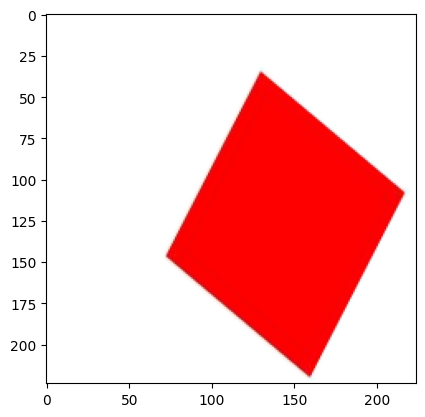

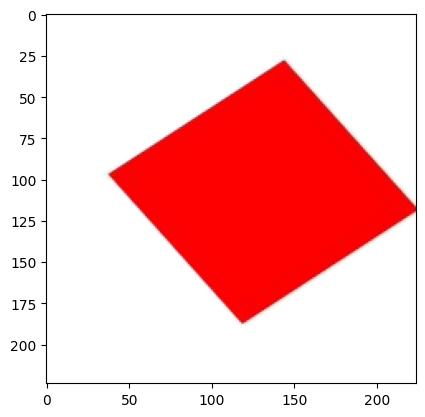

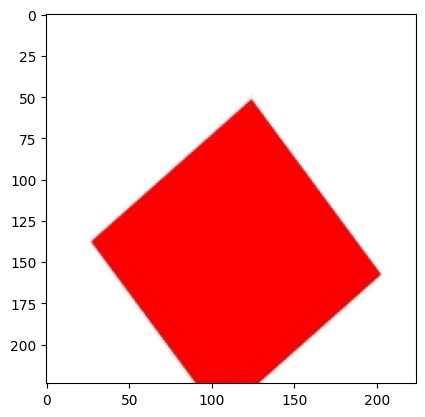

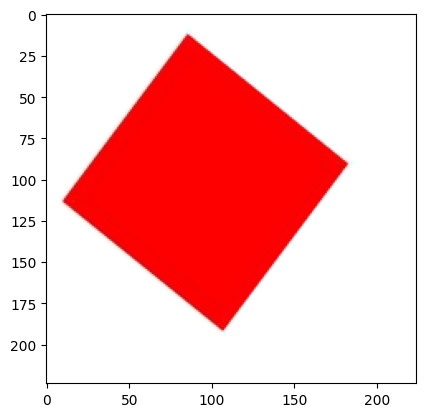

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Load the sample image
img_path = 'sample.jpg'
img = load_img(img_path)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Create an instance of ImageDataGenerator with basic augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate batches of augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()


Step 3: Feature-wise and sample-wise normalization

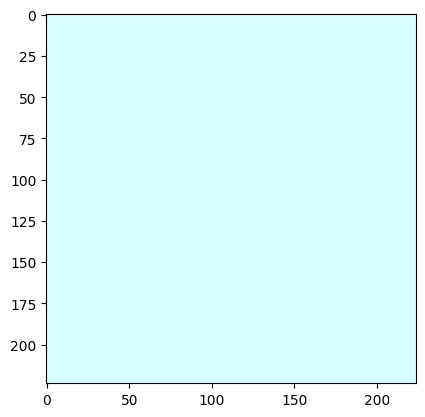

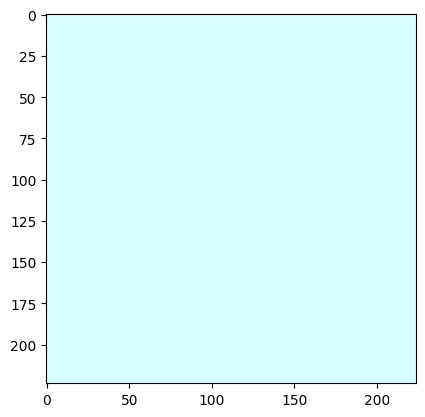

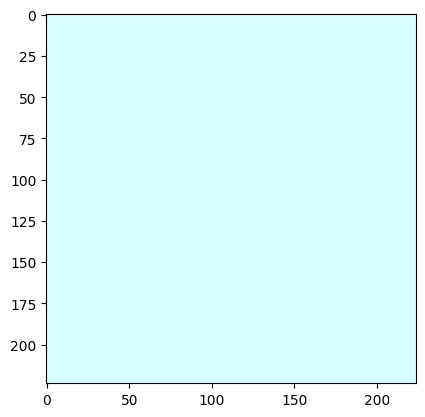

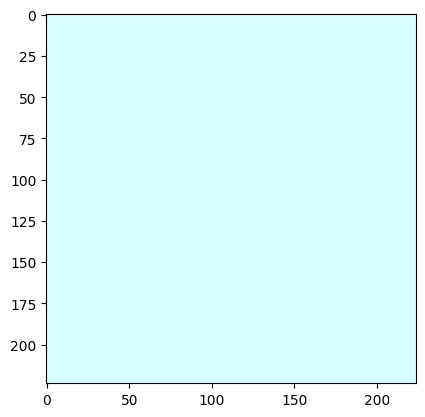

In [7]:
# Create an instance of ImageDataGenerator with normalization options
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Load the sample image again and fit the generator (normally done on the training set)
datagen.fit(x)

# Generate batches of normalized images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()


Step 4: Custom data augmentation function

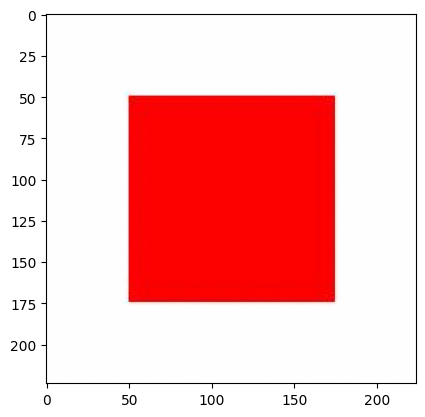

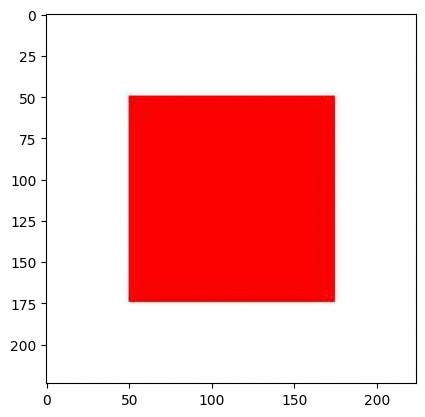

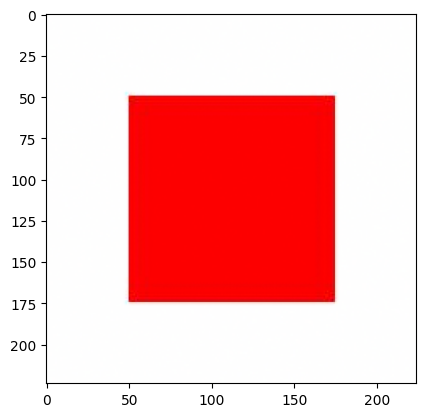

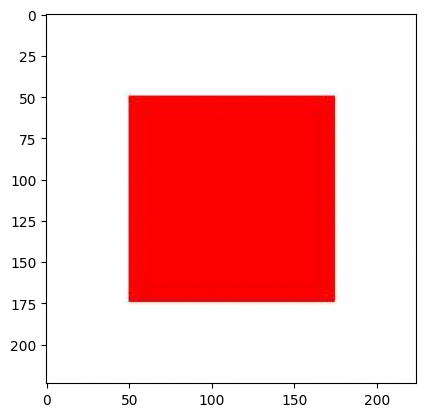

In [8]:
# Define a custom data augmentation function
def add_random_noise(image):
    noise = np.random.normal(0, 0.1, image.shape)
    return image + noise

# Create an instance of ImageDataGenerator with the custom augmentation
datagen = ImageDataGenerator(preprocessing_function=add_random_noise)

# Generate batches of augmented images with noise
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

Step 5: Visualize augmented images

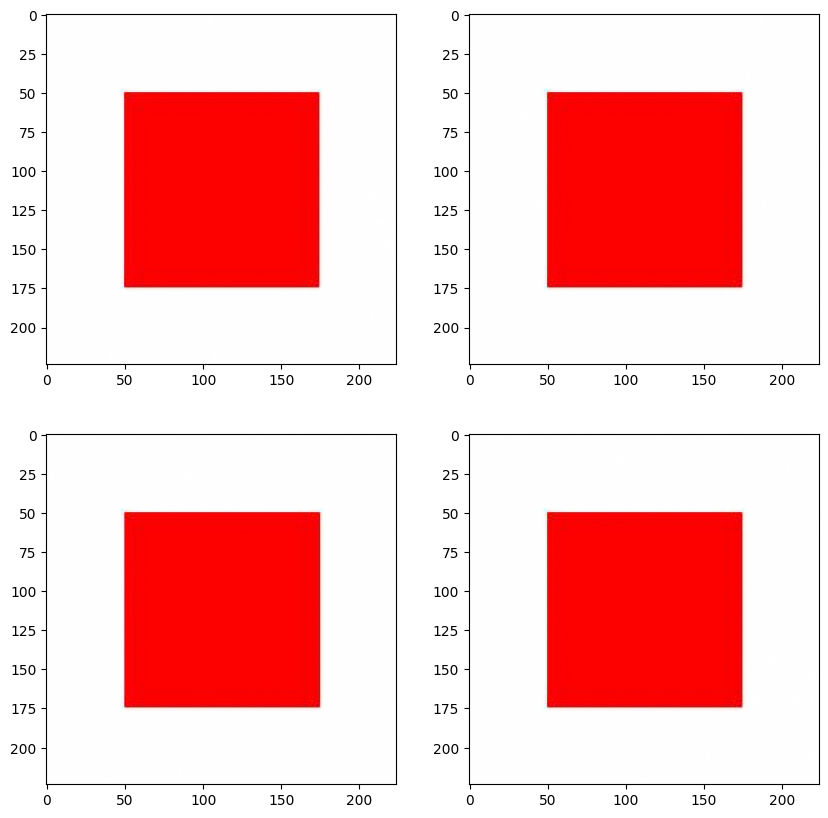

In [9]:
# Visualizing multiple augmented versions of the same image
plt.figure(figsize=(10, 10))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    if i >= 4:  # Show only 4 versions
        break
    plt.subplot(2, 2, i+1)
    plt.imshow(batch[0].astype('uint8'))
plt.show()


In [10]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/RgP3JFNtPTZA34UmG3KZaA/sample-images.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
